In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hs300merge/hs300merge2.csv


In [2]:
 #pip install d2l
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn import model_selection   
from sklearn import metrics
import seaborn as sns
import mpld3
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import MinMaxScaler
# print(pd.__version__)
# print(np.__version__)
# print(sklearn.__version__)
# print(sns.__version__)

In [3]:
import sys 
print(sys.version)

3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]


In [3]:
pip install tscv

Note: you may need to restart the kernel to use updated packages.


# 过去X交易日涨跌幅

In [4]:
hs300 = pd.read_csv('/kaggle/input/hs300merge/hs300merge2.csv')
hs300['date']=pd.to_datetime(hs300['date'])
#当日波动率、涨跌幅
hs300['volatility'] = hs300['high'] / hs300['low'] -1
hs300['increase'] = hs300['close']/hs300['close'].shift(-1) -1

#-----------------------------------------------

low_list = hs300['low'].rolling(window=9).min()
high_list = hs300['high'].rolling(window=9).max()

rsv = (hs300['close'] - low_list) / (high_list - low_list) * 100
# KDJ = pd.DataFrame()
hs300['K'] = rsv.ewm(com=2).mean()
hs300['D'] = hs300['K'].ewm(com=2).mean()
hs300['J'] = 3 * hs300['K'] - 2 * hs300['D']



#-------------------------------------------
hs300['last_1'] = hs300['increase'].shift(-1)
hs300['last_5'] = hs300['close'].shift(-1) / hs300['close'].shift(-6)-1
hs300['last_10'] = hs300['close'].shift(-1) / hs300['close'].shift(-11)-1
hs300['last_20'] = hs300['close'].shift(-1) / hs300['close'].shift(-21)-1
hs300.dropna(inplace=True)


# 未来X日股价

In [5]:
target = pd.DataFrame()
#未来涨幅 1/5/10/20日股价

hs300['1_future'] = hs300['close'].shift(1) 
hs300['5_future'] = hs300['close'].shift(5) 
hs300['10_future']= hs300['close'].shift(10) 
hs300['20_future'] = hs300['close'].shift(20) 
hs300['60_future'] = hs300['close'].shift(60) 
hs300['120_future'] = hs300['close'].shift(120) 
#未来涨跌 1/5/10/20
# def decribe(x):
#     if x>=0:
#         return 1
#     else:
#         return 0
# target['10_target'] = target['10_increase'].apply(lambda x:decribe(x))
# target['20_target'] = target['20_increase'].apply(lambda x:decribe(x))
# target['30_target'] = target['30_increase'].apply(lambda x:decribe(x))
# target['120_target'] = target['120_increase'].apply(lambda x:decribe(x))
hs300 = hs300.dropna()
hs300 = hs300.iloc[::-1]
hs300.reset_index(inplace=True)
hs300.drop('index',axis=1, inplace = True)
hs300.iloc[:,-6:]
hs300.reset_index(inplace = True)

In [6]:
hs300=hs300.drop(labels=['open','date','index','date','high','low'],axis=1)#,'close'
hs300

,month,close,volume,money,PE-TTM市值加权,PE-TTM 分位点,PE-TTM 80%分位点,PE-TTM 50%分位点,PE-TTM 20%分位点,PB市值加权,...,last_1,last_5,last_10,last_20,1_future,5_future,10_future,20_future,60_future,120_future
0,5,875.27,822428800,4630088469,14.1084,0.0000,15.3013,15.0148,14.6952,1.7244,...,0.001942,-0.048102,-0.054904,-0.115511,881.46,863.34,855.61,892.96,927.47,877.28
1,5,881.46,877227300,4635198616,14.1197,0.0455,15.3013,15.0081,14.5984,1.7263,...,-0.013825,-0.037287,-0.058920,-0.120703,883.20,868.46,855.95,883.54,933.09,881.52
2,5,883.20,787861000,4615409280,14.1280,0.0870,15.2600,15.0057,14.5984,1.7284,...,0.007072,-0.034630,-0.059355,-0.099356,884.17,868.45,837.53,866.83,940.37,879.25
3,5,884.17,814958300,4263472583,14.1273,0.0833,15.2600,15.0033,14.3016,1.7301,...,0.001974,-0.020680,-0.046838,-0.117594,882.76,857.33,818.38,879.24,953.99,862.97
4,5,882.76,722667600,3835476288,14.0817,0.0000,15.2600,14.9955,14.2811,1.7254,...,0.001098,-0.001863,-0.061460,-0.104166,863.34,849.51,818.03,880.35,938.32,864.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,6,4325.57,16466761500,317163000000,12.6371,0.3727,17.8685,13.5404,11.2816,1.4921,...,0.004964,0.033676,0.039447,0.062005,4270.62,4490.52,4489.54,4269.34,4065.36,3954.89
4160,6,4270.62,15856585400,298656000000,12.4819,0.3571,17.8685,13.5396,11.2816,1.4724,...,-0.001122,0.024456,0.035041,0.066993,4343.88,4421.36,4423.97,4283.80,4027.12,3951.99
4161,6,4343.88,17088236000,327145000000,12.6773,0.3754,17.8685,13.5388,11.2816,1.4958,...,-0.012704,-0.001776,0.012041,0.078671,4394.77,4485.01,4443.47,4236.06,3932.68,3954.23
4162,6,4394.77,16897219900,356055000000,12.7807,0.3870,17.8493,13.5387,11.2824,1.5084,...,0.017154,0.022075,0.040283,0.090556,4444.26,4466.72,4428.78,4238.23,3928.00,3893.22


# SVR预测

In [7]:
#0-1标准化处理
preprocess = MinMaxScaler()
raw_data = hs300#.iloc[:,2:]
data = preprocess.fit_transform(raw_data)

y_ = data[:,-6:]  #取出后四列作为目标值
tag = y_[:,2]     #取出目标值的第0-5列
data2 = data[:,:-6] #取出除自变量值

训练集mse值为： 0.0009635465595975904 测试集mse值为： 0.003937965225970572
训练集r2值为： 0.988019959449291 测试集r2值为： -0.057434308773933074
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

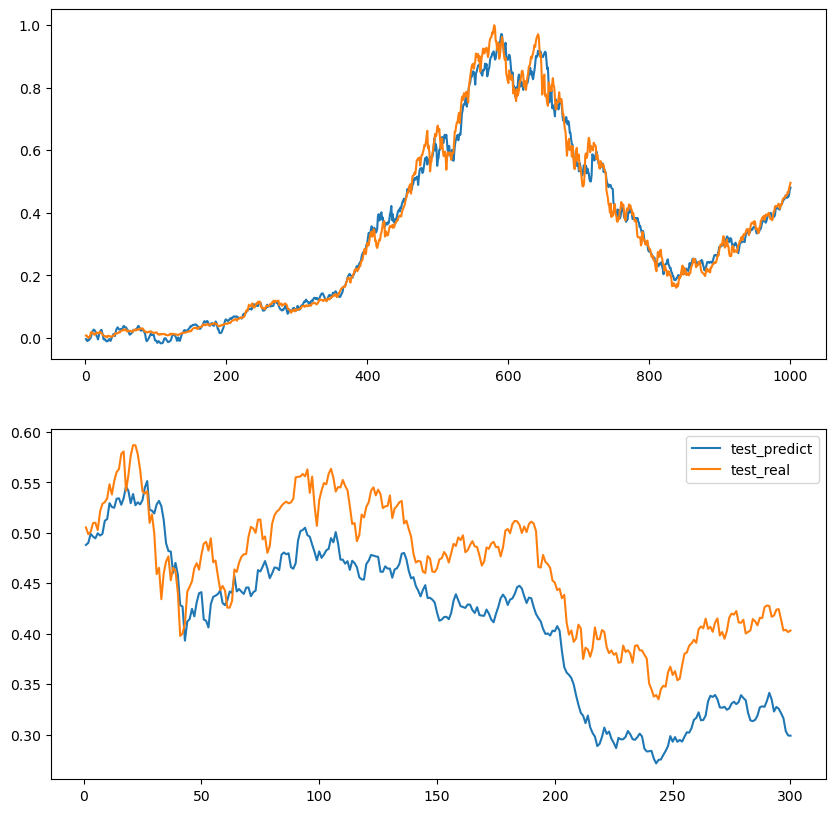

训练集mse值为： 0.0007818705008163698 测试集mse值为： 0.0014180436472110902
训练集r2值为： 0.9881152978919808 测试集r2值为： 0.47846573464838527
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

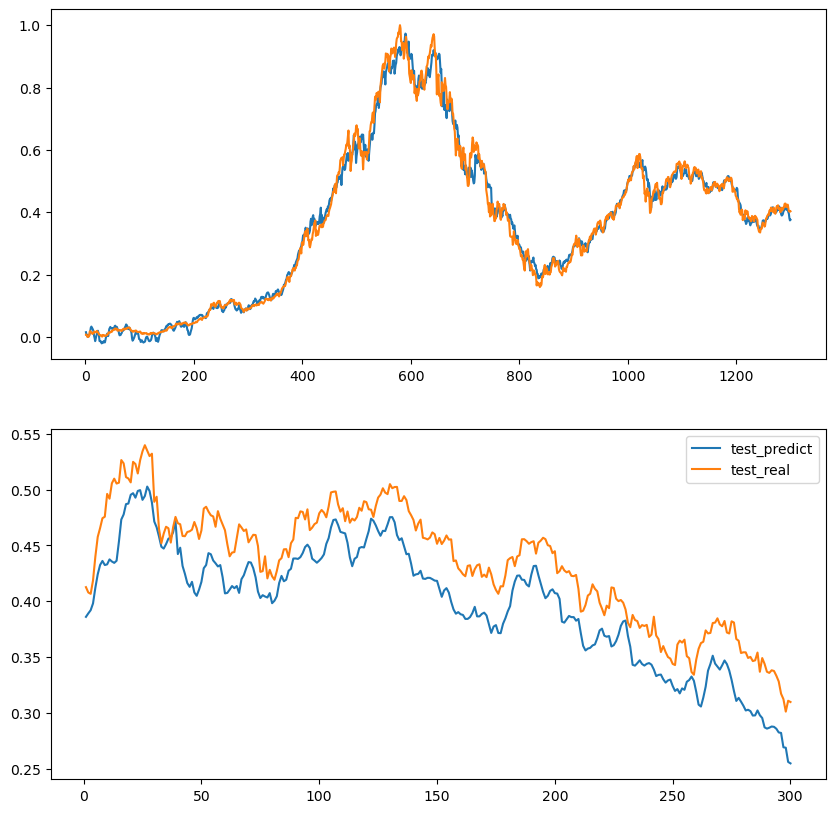

训练集mse值为： 0.0006645176873869232 测试集mse值为： 0.005512986815944818
训练集r2值为： 0.9878484280479216 测试集r2值为： -4.472564704583086
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

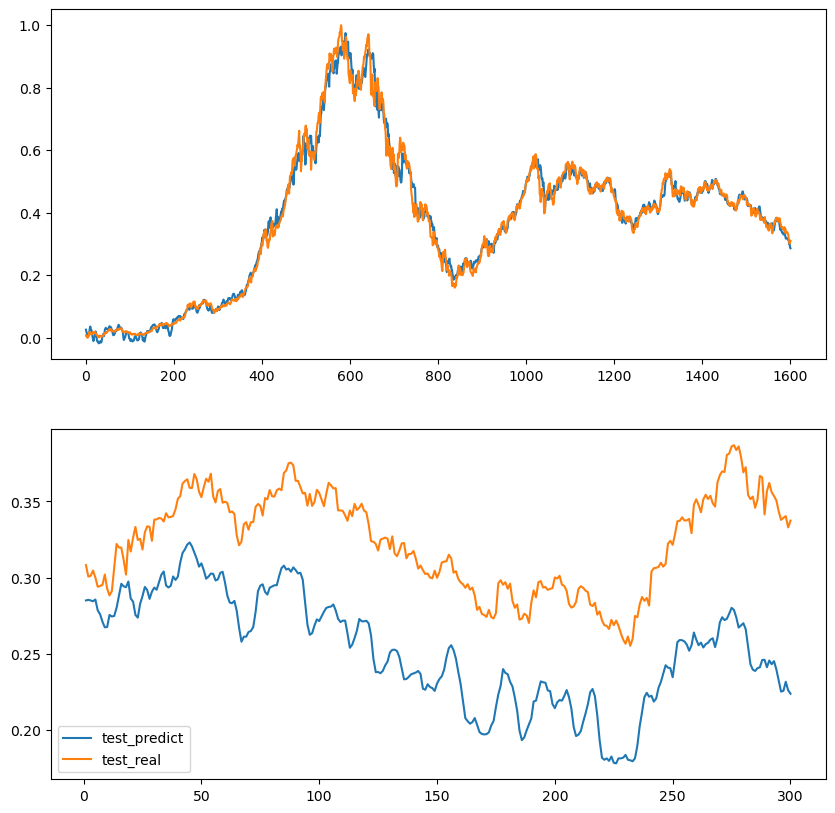

训练集mse值为： 0.0005938252396120438 测试集mse值为： 0.00012289736557760973
训练集r2值为： 0.9872599522185909 测试集r2值为： 0.8426839387475551
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

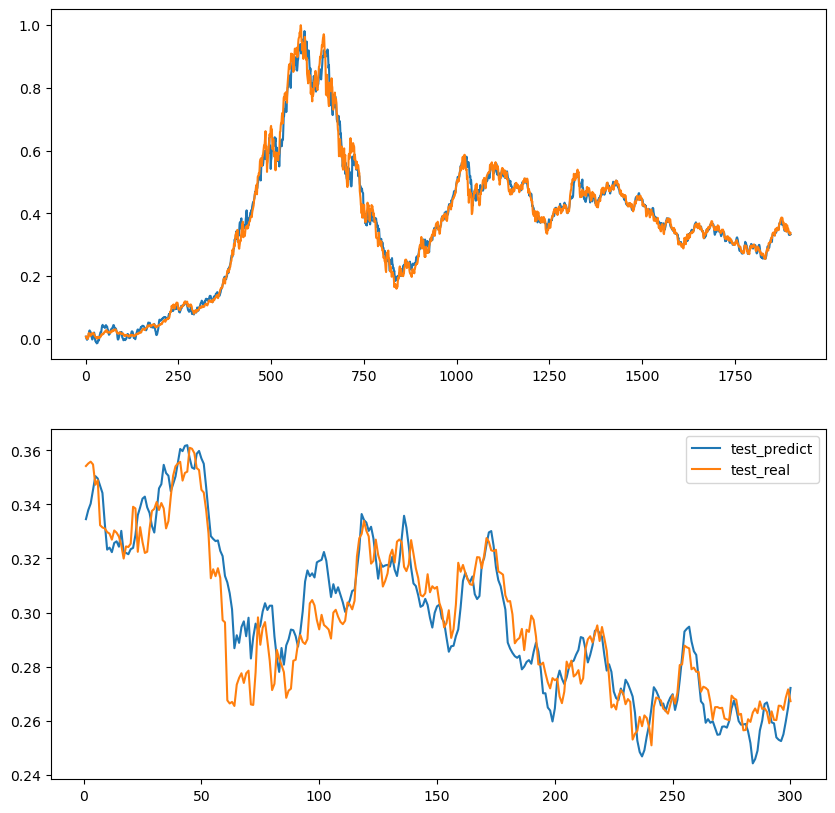

训练集mse值为： 0.0005310751081334887 测试集mse值为： 0.00480821317612641
训练集r2值为： 0.9870390138722404 测试集r2值为： 0.8578658674058008
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

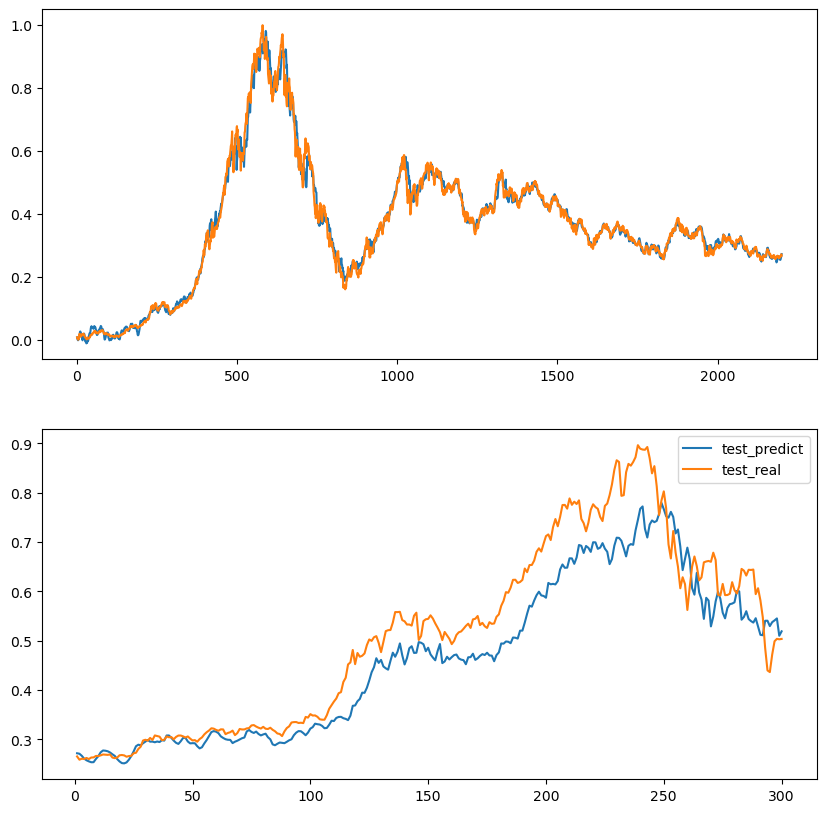

训练集mse值为： 0.0006942650157018625 测试集mse值为： 0.002128578008053556
训练集r2值为： 0.9836509127482419 测试集r2值为： -0.09470536710926591
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

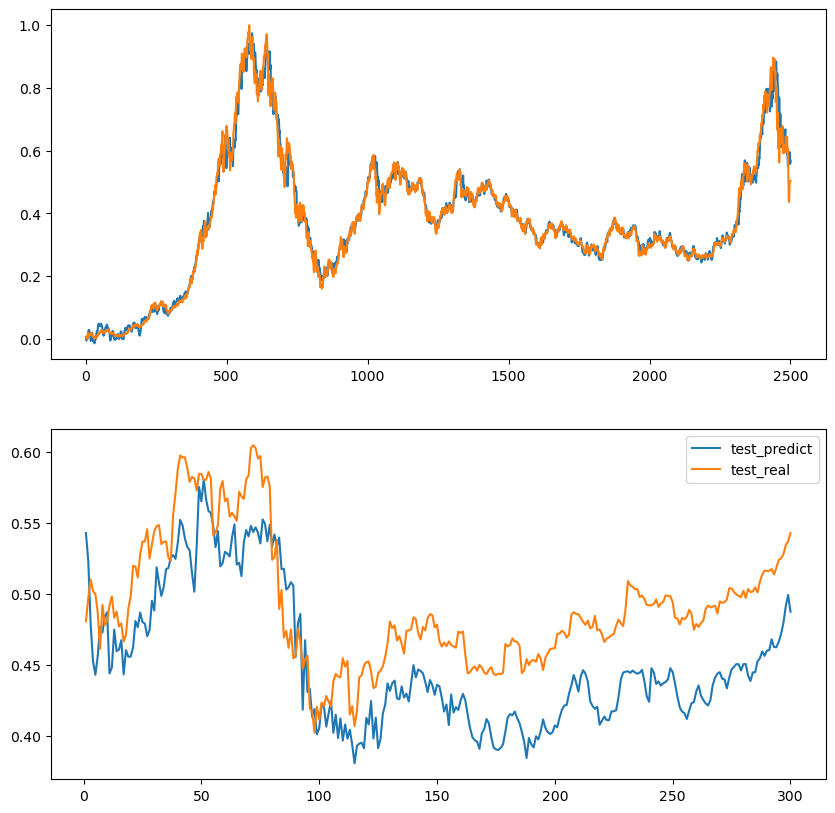

训练集mse值为： 0.0006399949989013958 测试集mse值为： 0.0005159148345303169
训练集r2值为： 0.9837463196939492 测试集r2值为： 0.8466793599171801
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

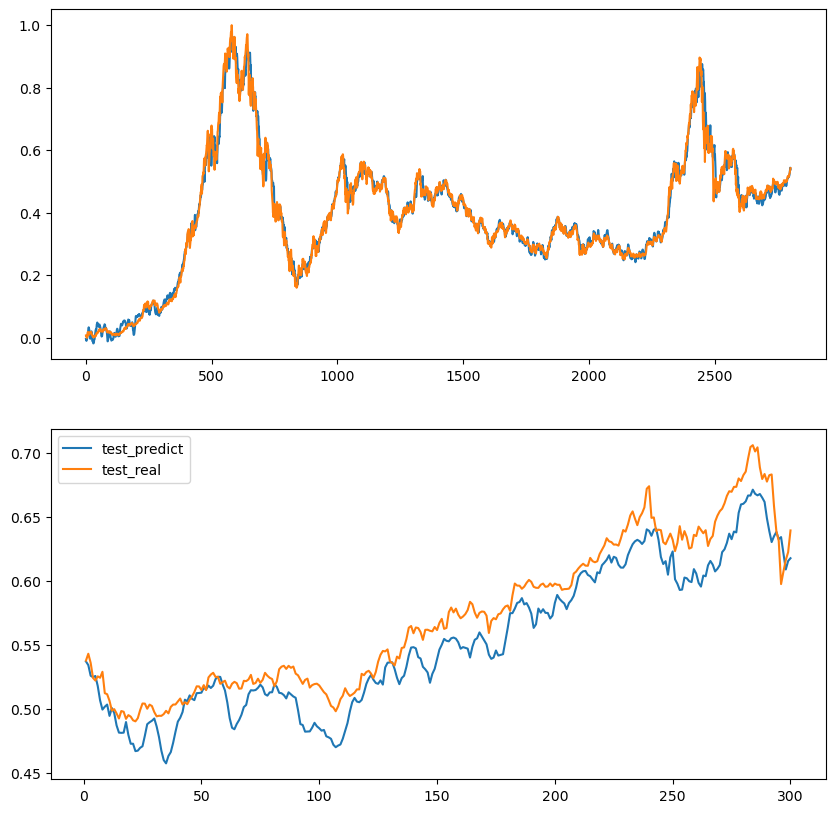

训练集mse值为： 0.0006092200602655569 测试集mse值为： 0.0004753809635906195
训练集r2值为： 0.984288679334593 测试集r2值为： 0.8878580612287078
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

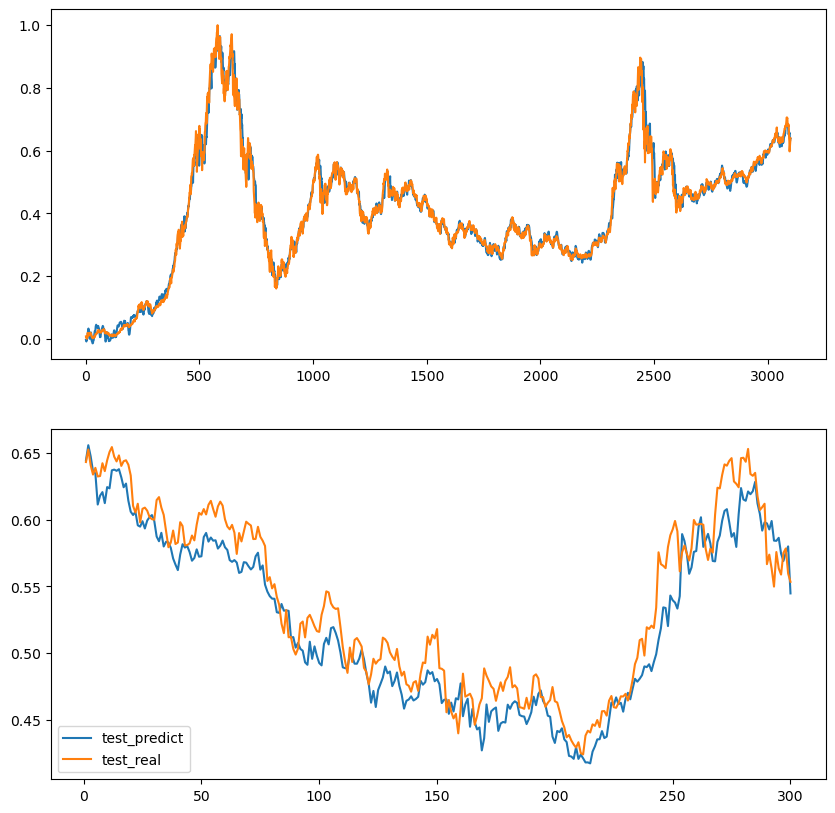

训练集mse值为： 0.0005718030403489608 测试集mse值为： 0.0005859940953623978
训练集r2值为： 0.9845938514140521 测试集r2值为： 0.796943026629561
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

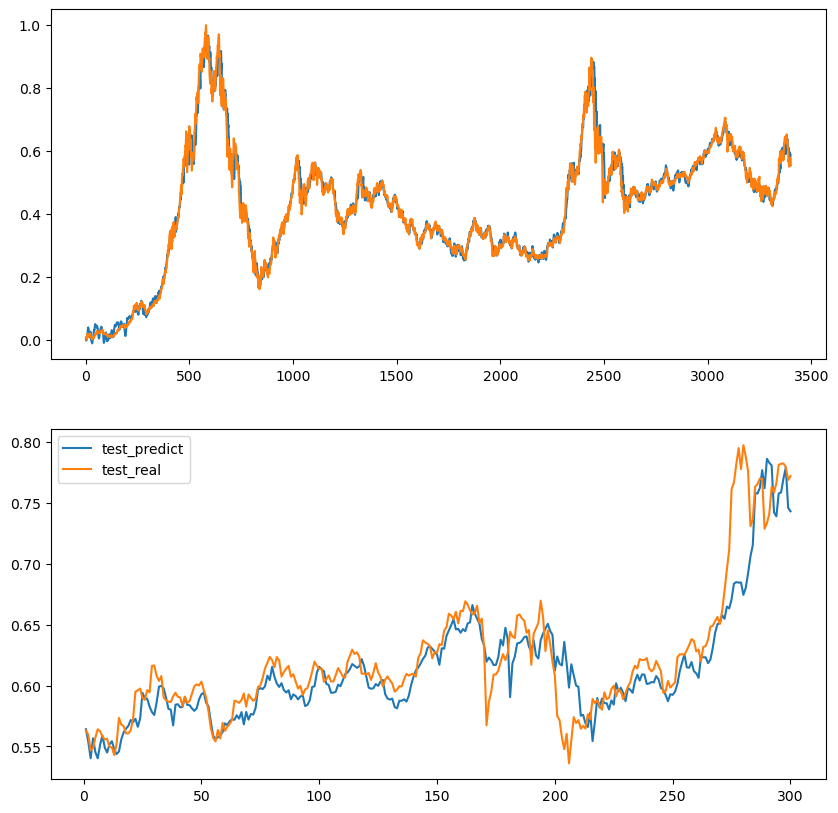

训练集mse值为： 0.0005585412842430014 测试集mse值为： 0.000507883458053063
训练集r2值为： 0.9850609498394715 测试集r2值为： 0.7899725610110722
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

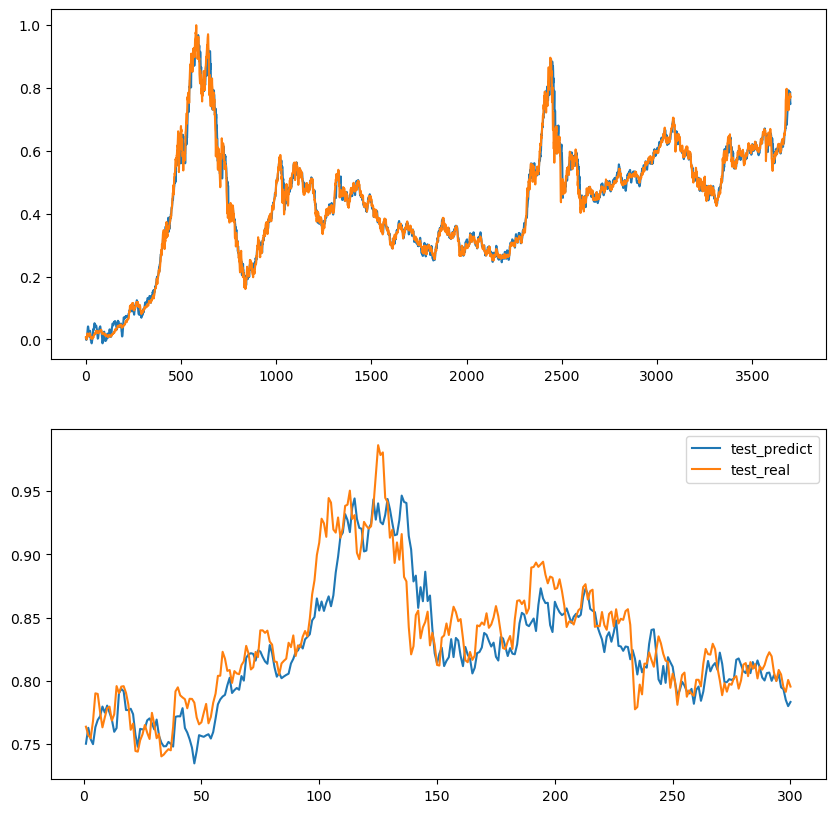

训练集mse值为： 0.0005438593654008413 测试集mse值为： 0.00028777280429400124
训练集r2值为： 0.9880889724493762 测试集r2值为： 0.9410490198303139
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

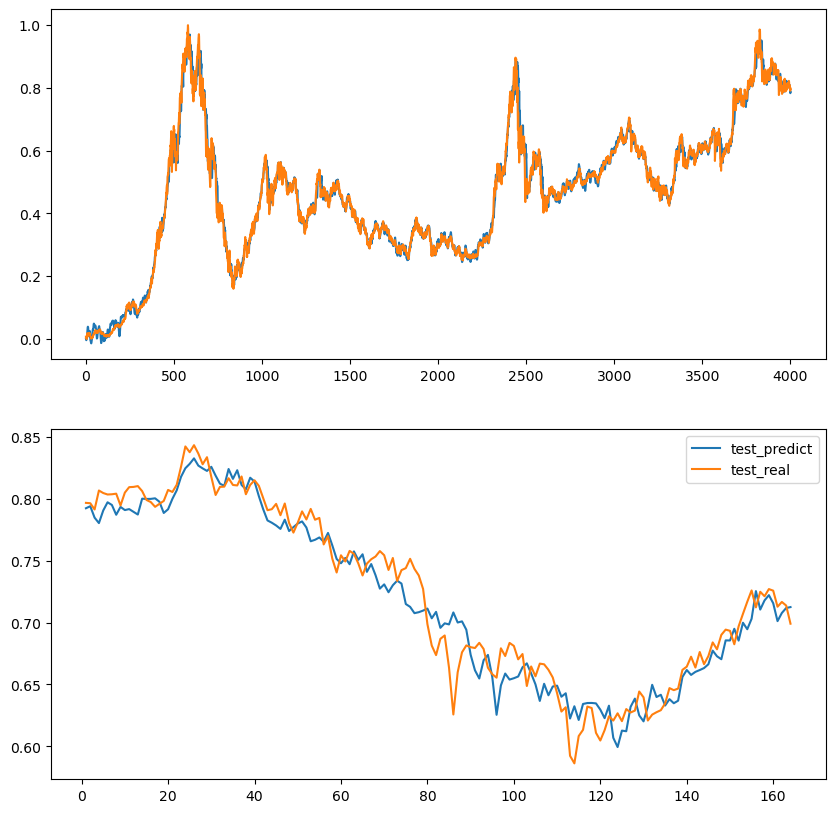

[0.0009635465595975904, 0.0007818705008163698, 0.0006645176873869232, 0.0005938252396120438, 0.0005310751081334887, 0.0006942650157018625, 0.0006399949989013958, 0.0006092200602655569, 0.0005718030403489608, 0.0005585412842430014, 0.0005438593654008413]


[0.003937965225970572, 0.0014180436472110902, 0.005512986815944818, 0.00012289736557760973, 0.00480821317612641, 0.002128578008053556, 0.0005159148345303169, 0.0004753809635906195, 0.0005859940953623978, 0.000507883458053063, 0.00028777280429400124]


In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from tscv import GapRollForward
cv = GapRollForward(min_train_size=1000, gap_size=0, max_test_size=300)
train_mse_all = []
test_mse_all = []
for train_index, test_index in cv.split(range(len(data))):
    train_x, test_x = data2[train_index], data2[test_index]
    train_y , test_y = tag[train_index], tag[test_index]
    clf = SVR(C=10,kernel='rbf',gamma=0.001,tol=1e-5,epsilon=0.001)#
    clf.fit(train_x,train_y)
    train_predict = clf.predict(train_x)
    test_predict = clf.predict(test_x)
    train_mse = mean_squared_error(train_y, train_predict)
    test_mse = mean_squared_error(test_y,test_predict)
    train_mse_all.append(train_mse)
    test_mse_all.append(test_mse)
    print("训练集mse值为：",train_mse,"测试集mse值为：",test_mse)
    train_r2 = r2_score(train_y, train_predict)
    test_r2  = r2_score(test_y, test_predict)
    print("训练集r2值为：",train_r2,"测试集r2值为：",test_r2)
    l1 = len(train_x) + 1
    l2 = len(test_x) + 1
#     print(test_y)
    fig = plt.figure(figsize=(120,30))
    fig, a = plt.subplots(2, 1,figsize=(10,10))
    a[0].plot(np.arange(1,l1),train_predict, '-', label="train_predict")
    a[0].plot(np.arange(1,l1), train_y, '-', label="train_real")
    print('-'*40)
    a[1].plot(np.arange(1,l2),test_predict, '-', label="test_predict")
    a[1].plot(np.arange(1,l2), test_y, '-', label="test_real")
    plt.legend()
    plt.show()
print(train_mse_all)#
print('\n')
print(test_mse_all)

# 决策树回归模型

训练集mse值为： 0.000491451335386038 测试集mse值为： 0.0047431510353393375
训练集r2值为： 0.9938896497860117 测试集r2值为： -0.27364523266663743
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

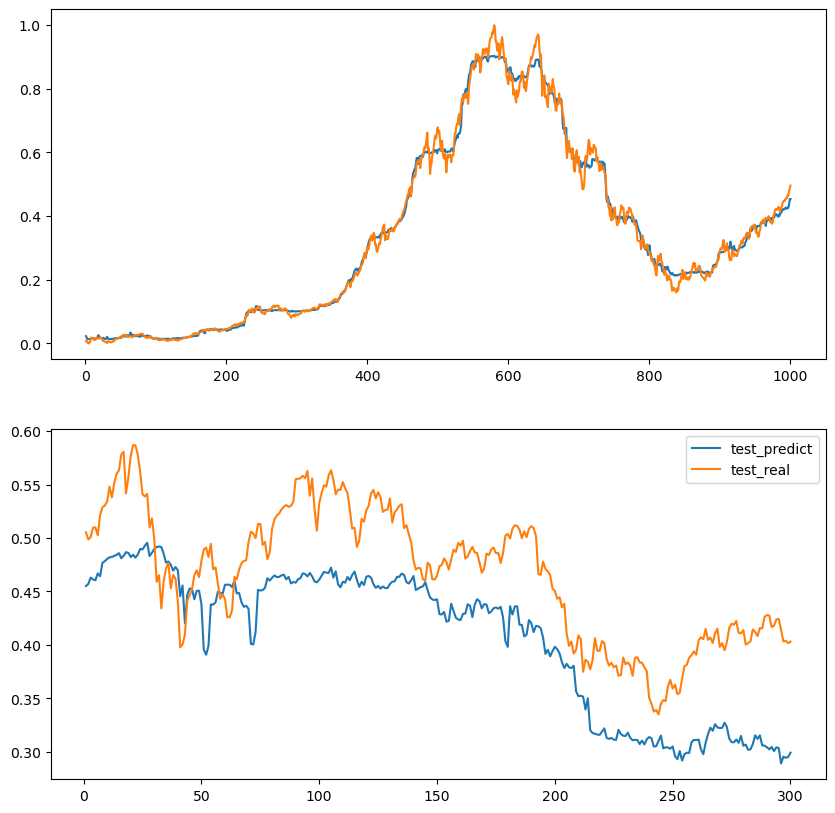

训练集mse值为： 0.0006459171858794907 测试集mse值为： 0.003913870812272302
训练集r2值为： 0.9901818353133767 测试集r2值为： -0.4394604445174082
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

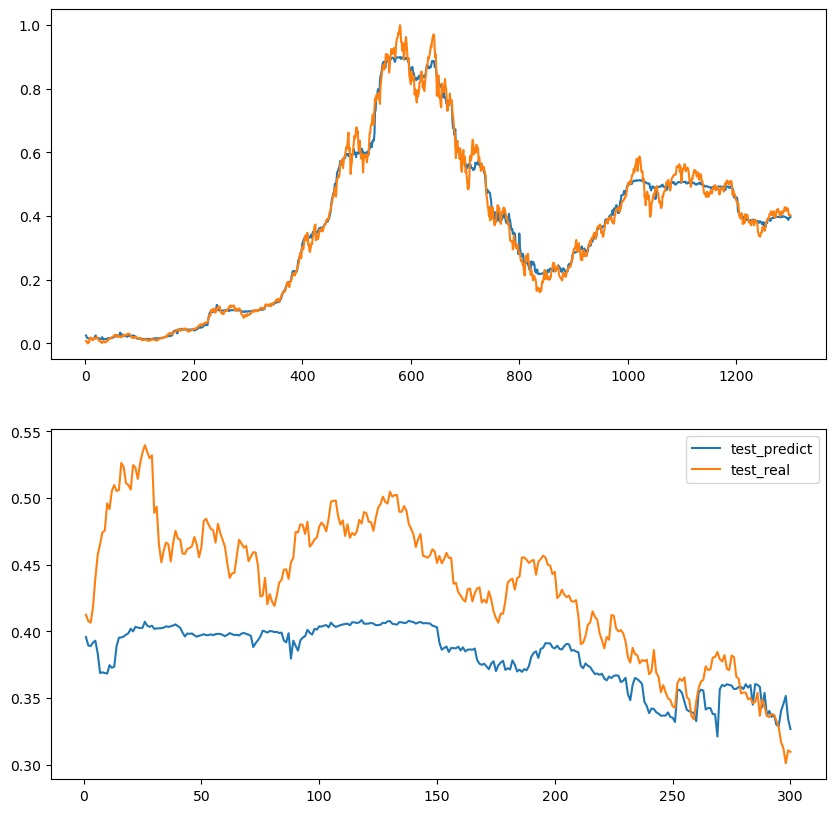

训练集mse值为： 0.0008180629932365113 测试集mse值为： 0.00037085365011115093
训练集r2值为： 0.9850406520212637 测试集r2值为： 0.6318655088573307
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

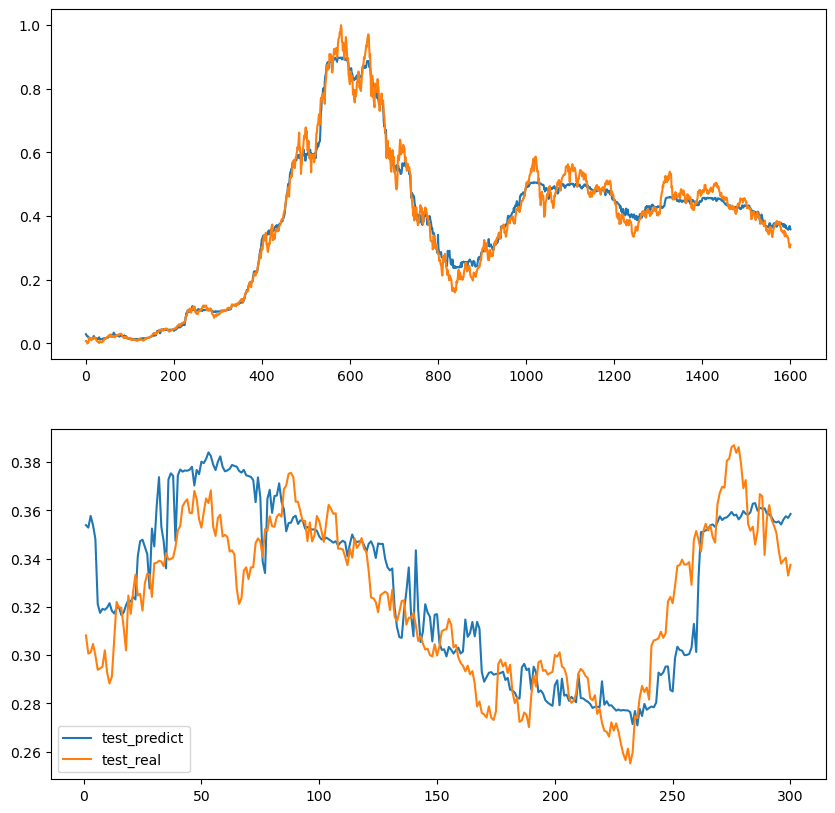

训练集mse值为： 0.0007625691419501921 测试集mse值为： 0.0006858884444255395
训练集r2值为： 0.98363968612816 测试集r2值为： 0.12202130592089366
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

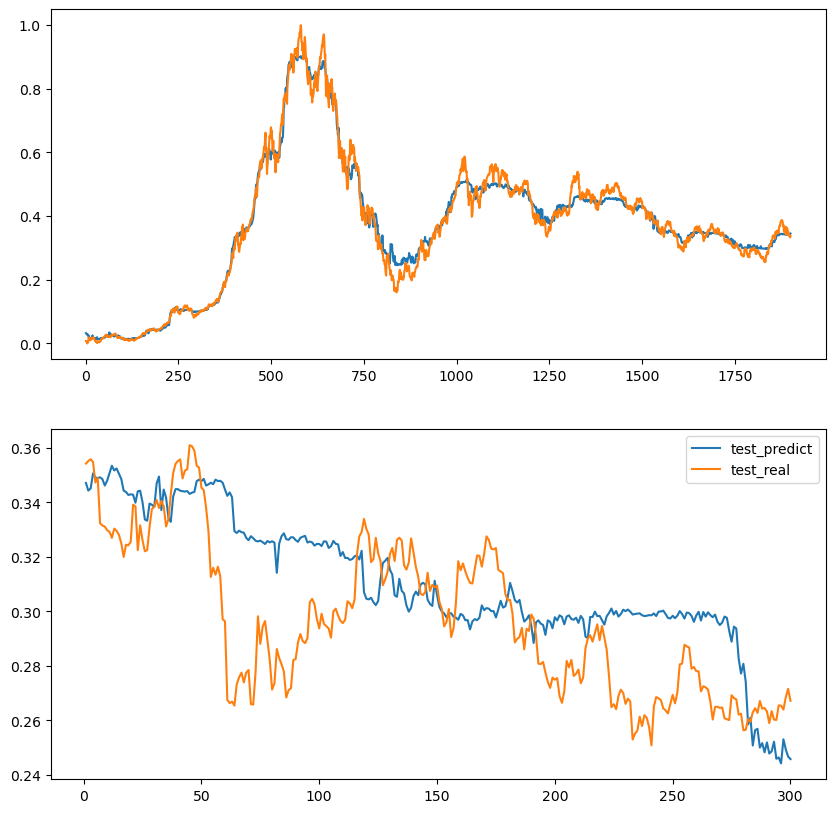

训练集mse值为： 0.0007248230742602532 测试集mse值为： 0.05493194860096234
训练集r2值为： 0.9823105589648425 测试集r2值为： -0.6238266857371235
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

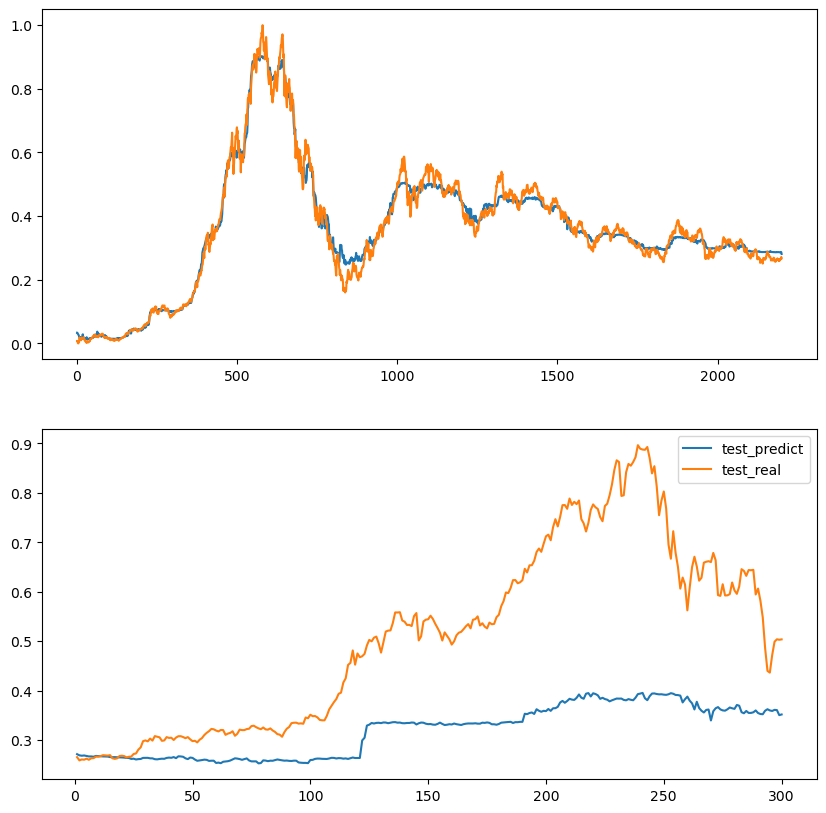

训练集mse值为： 0.001067586089247213 测试集mse值为： 0.0012183058224639453
训练集r2值为： 0.9748596606092548 测试集r2值为： 0.3734380804529136
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

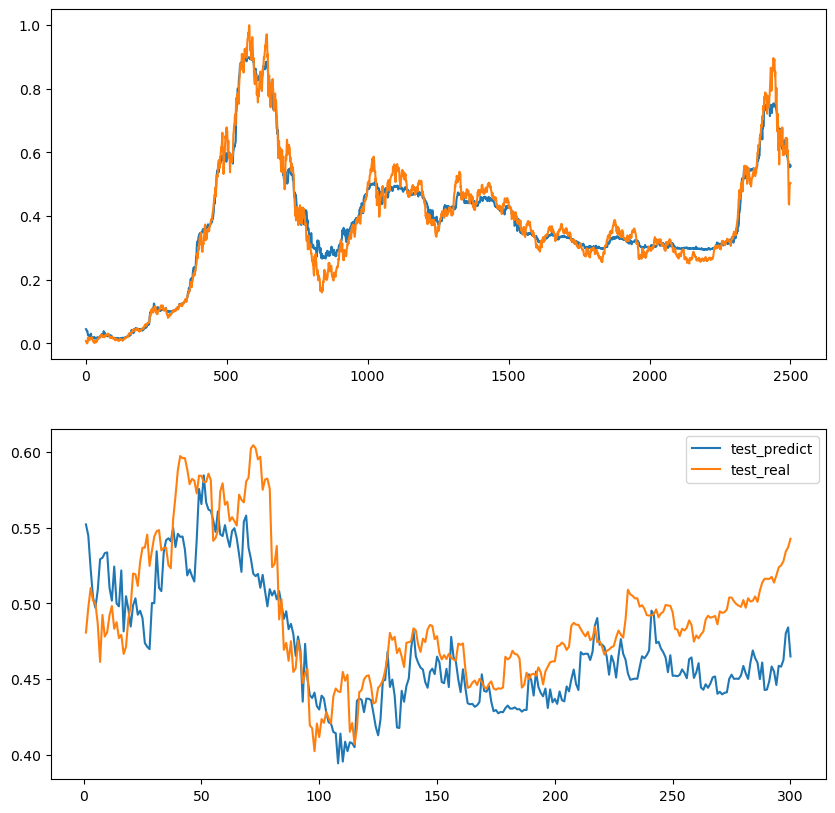

训练集mse值为： 0.0011528617230748411 测试集mse值为： 0.008404098234764137
训练集r2值为： 0.9707212620159422 测试集r2值为： -1.497547336172239
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

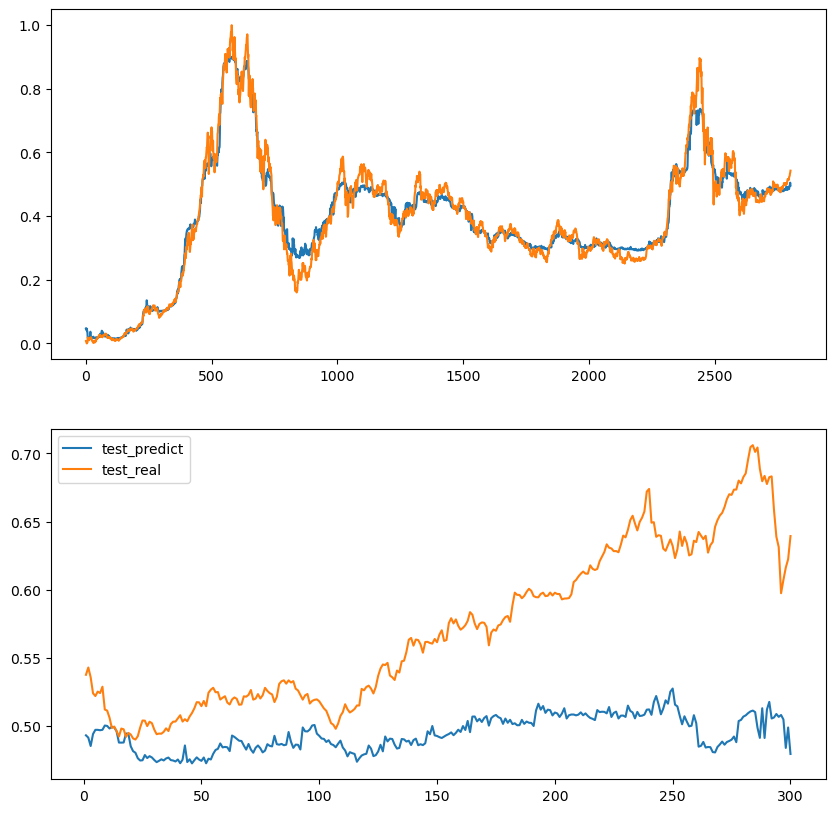

训练集mse值为： 0.0012001705144102826 测试集mse值为： 0.007988829644287189
训练集r2值为： 0.969048517875713 测试集r2值为： -0.8845576778195086
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

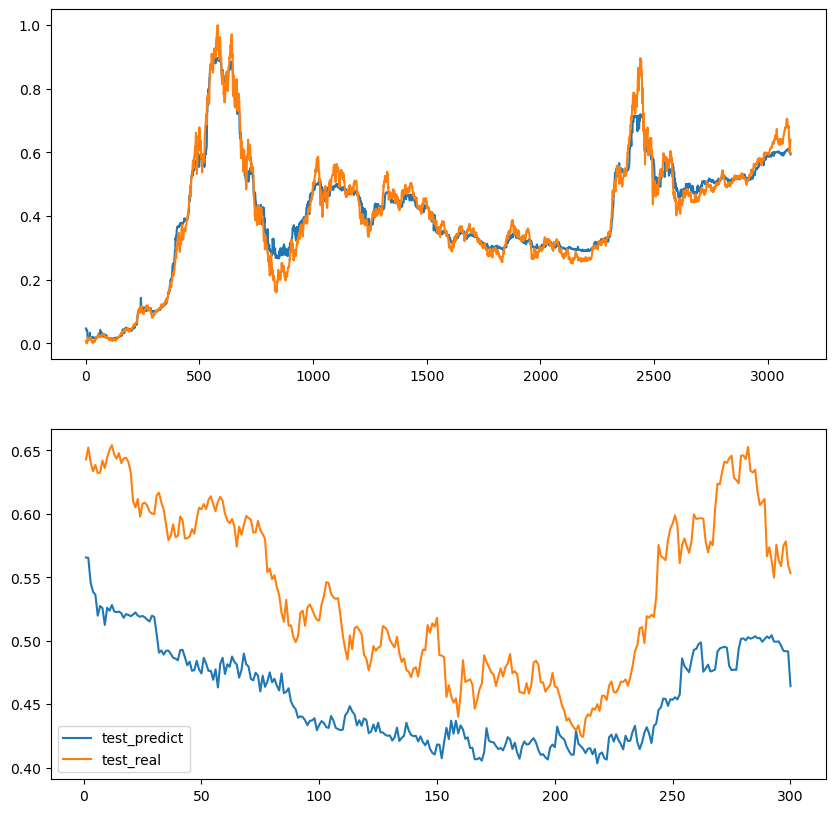

训练集mse值为： 0.0012927814477685295 测试集mse值为： 0.028721162910414003
训练集r2值为： 0.9651684554504574 测试集r2值为： -8.952374022917857
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

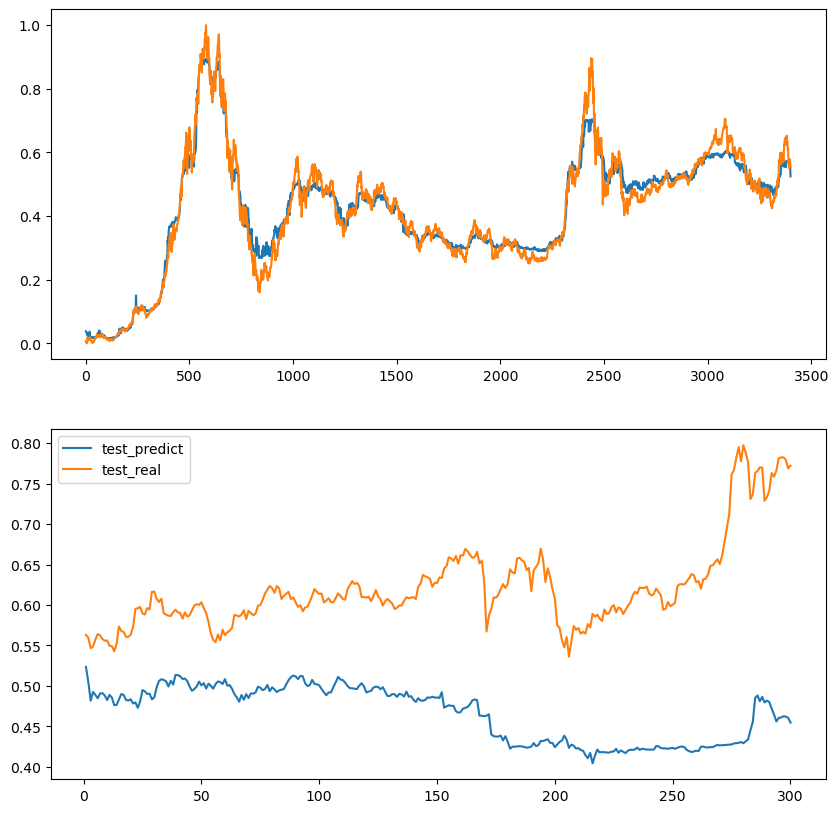

训练集mse值为： 0.0013686684371585192 测试集mse值为： 0.09079503424368864
训练集r2值为： 0.9633928466656588 测试集r2值为： -36.54689823570031
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

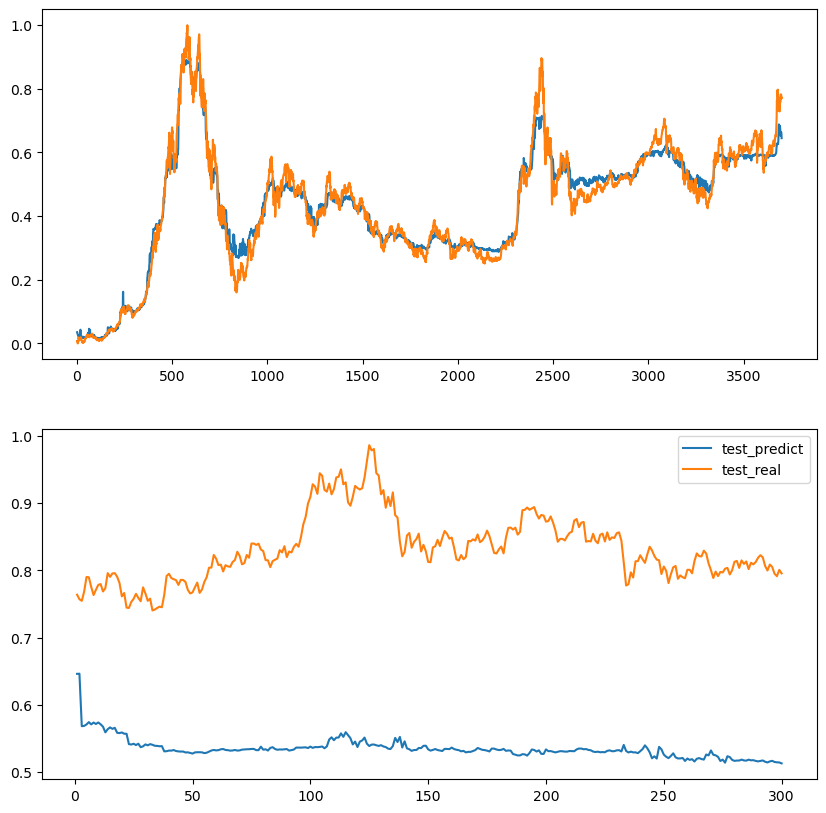

训练集mse值为： 0.0013654463391298724 测试集mse值为： 0.0050831929023810105
训练集r2值为： 0.9700954511424341 测试集r2值为： -0.0413048054423073
----------------------------------------


<Figure size 12000x3000 with 0 Axes>

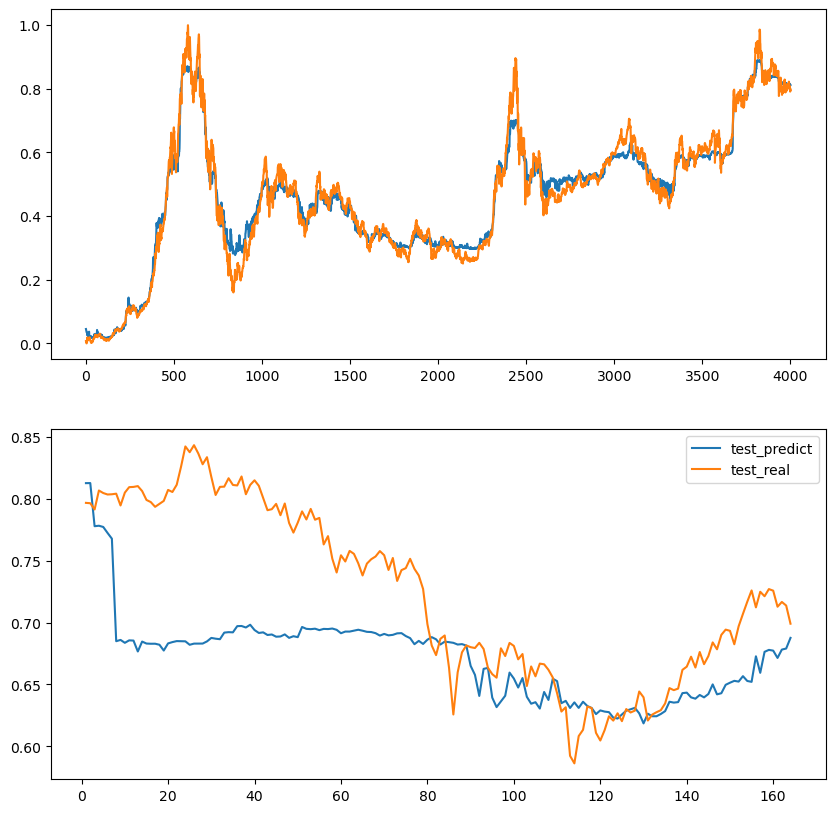

In [10]:
from sklearn.ensemble import RandomForestRegressor
train_mse_all = []
test_mse_all = []
cv = GapRollForward(min_train_size=1000, gap_size=0, max_test_size=300)
for train_index, test_index in cv.split(range(len(data))):
    train_x, test_x = data2[train_index], data2[test_index]
    train_y , test_y = tag[train_index], tag[test_index]
    clf = RandomForestRegressor(n_estimators=400, random_state=0,max_depth=5,max_features='log2')
    clf.fit(train_x,train_y)
    train_predict = clf.predict(train_x)
    test_predict = clf.predict(test_x)
    train_mse = mean_squared_error(train_y, train_predict)
    test_mse = mean_squared_error(test_y,test_predict)
    train_mse_all.append(train_mse)
    test_mse_all.append(test_mse)
    print("训练集mse值为：",train_mse,"测试集mse值为：",test_mse)
    train_r2 = r2_score(train_y, train_predict)
    test_r2  = r2_score(test_y, test_predict)
    print("训练集r2值为：",train_r2,"测试集r2值为：",test_r2)
    l1 = len(train_x) + 1
    l2 = len(test_x) + 1
#     print(test_y)
    fig = plt.figure(figsize=(120,30))
    fig, a = plt.subplots(2, 1,figsize=(10,10))
    a[0].plot(np.arange(1,l1),train_predict, '-', label="train_predict")
    a[0].plot(np.arange(1,l1), train_y, '-', label="train_real")
    print('-'*40)
    a[1].plot(np.arange(1,l2),test_predict, '-', label="test_predict")
    a[1].plot(np.arange(1,l2), test_y, '-', label="test_real")
    plt.legend()
    plt.show()
# print(clf.coef_)
# print(train_mse_all,'\n',test_mse_all)

In [ ]:
# # 网格搜索SVC
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV
# model = svm.SVC(probability=True)
# params = [
# {'kernel':['rbf'],'C':[1,10,100,1000], 
#  'gamma':[1,0.1, 0.01, 0.001]}]
# #model = GridSearchCV(estimator=model, param_grid=params, cv=5)
# model.fit(train_x, train_y)

# # 网格搜索训练后的副产品
# print("模型的最优参数：",model.best_params_)
# print("最优模型分数：",model.best_score_)
# print("最优模型对象：",model.best_estimator_)

# LSTM

In [ ]:
#预测20日涨跌# hs300.drop(['last_1','last_5','last_10','last_20'],axis=1, inplace=True)

#### hs300['target_20'] = target['20_target']
hs300.shape
hs300.head(5)

In [ ]:
dataset = hs300.iloc[:,:-4]
dataset['20_future']= hs300['20_future']
def normalization(data):
    mm_x=MinMaxScaler() #min、max处理
    data=mm_x.fit_transform(data) # 对数据进行归一化等处理
    return data
dataset = normalization(dataset)
train_size = int(len(dataset)*0.7)
test_size = len(dataset)-train_size
print(train_size,test_size)

train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]


In [ ]:
print(train.shape)
print(test.shape)

In [ ]:
import numpy as np
def split_windows(data,seq_length):# 窗口滑动seq_len为时间段的长度
    x=[]
    y=[]
    for i in range(len(data)-seq_length-1): 
        _x=data[i:(i+seq_length),:-1]
        _y=data[i+seq_length,-1]
        x.append(_x)
        y.append(_y)
    x,y=np.array(x),np.array(y)
    print('x.shape,y.shape=\n',x.shape,y.shape)
    return x,y
x_train,y_train = split_windows(train,20)
x_test ,y_test = split_windows(test,20)

In [ ]:
# 加载数据（包括转换张量、设置batch_size）
from torch.utils.data import TensorDataset
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
def data_generator(x_train,y_train,x_test,y_test,n_iters,batch_size):
    num_epochs=n_iters/(len(x_train)/batch_size) 
    num_epochs=int(num_epochs)
    x_train = torch.tensor(x_train,dtype=torch.float32)#.cuda()
    y_train = torch.tensor(y_train,dtype=torch.float32)#.cuda()
    train_dataset=TensorDataset(x_train,y_train)
    x_test = torch.tensor(x_test,dtype=torch.float32)#.cuda()
    y_test = torch.tensor(y_test,dtype=torch.float32)#.cuda()
    test_dataset=TensorDataset(x_test,y_test)
    #转换数据集，无法整除的最后几行全部删除
    train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True,drop_last=True) 
    test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True,drop_last=True)
    return train_loader,test_loader,num_epochs


#-------------------------------------------------------
#设置参数
seq_length=200    # 时间步长
input_size=24
num_layers=3
hidden_size=64
batch_size=32
n_iters=1000
lr=0.0001
output_size=1

train_load,test_load,num = data_generator(x_train,y_train,x_test,y_test,n_iters,batch_size)
print('epoch数:',num)

In [ ]:
# 神经网络
class Net(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,output_size,batch_size,seq_length) -> None:
        super(Net,self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.output_size=output_size
        self.batch_size=batch_size
        self.seq_length=seq_length
        self.num_directions=1 # 单向LSTM

        self.lstm=nn.LSTM(input_size=input_size,hidden_size=hidden_size,
                          num_layers=num_layers,dropout = 0.5,batch_first=True)
        self.fc=nn.Linear(hidden_size,output_size) # 全连接层
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        batch_size, seq_len = x.size()[0], x.size()[1]    # x.shape=(2982,20,25)
        h_0 = torch.randn(self.num_directions * self.num_layers, x.size(0), self.hidden_size)#.cuda()
        c_0 = torch.randn(self.num_directions * self.num_layers, x.size(0), self.hidden_size)#.cuda()
        output, _ = self.lstm(x, (h_0, c_0))
        pred = self.fc(output)
        pred = self.sigmoid(pred)
        pred = pred[:, -1, :]
        pred = pred.squeeze(-1)
        return pred
module=Net(input_size,hidden_size,num_layers,output_size,batch_size,seq_length)
module#

In [ ]:
import torch.optim as optim
criterion=torch.nn.MSELoss() #误差评价
optimizer = optim.SGD(module.parameters(), lr)#, momentum=0.1
# output = []
iter=0
for epochs in range(num):
    for i,(batch_x, batch_y) in enumerate(train_load):
        outputs = module(batch_x)
#         output = output.append(outputs)
# #          print(outputs)
        optimizer.zero_grad()#  将每次传播时的梯度累积清除
#         outputs = torch.round(outputs)
        loss_ = criterion(outputs,batch_y)# 计算损失
#         
        loss_.backward() # 反向传播
        optimizer.step()
        iter+=1
        if iter % 100 == 0:
            print("iter: %d, loss: %1.3f" % (iter, loss_.item()))
            
# print(torch.round(output))
print(outputs)        


In [ ]:
# cm = confusion_matrix(train_y, output.argmax(axis=1))
# print('Confusion Matrix')
# print(cm)

In [ ]:
 # 开始验证
module.eval()
for i in range(1):
    for seq, labels in test_load: 
        y_pred = module(seq).squeeze()  # 压缩维度：得到输出，并将维度为1的去除
        single_loss = criterion(y_pred, labels)
#         print(y_pred)
        print("EVAL Step:", i, " loss: ", single_loss)


In [ ]:
# pred_y_for_test = lstm_model(x_test).cuda()